In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import skimage.io as io
from skimage.transform import resize

In [2]:
#Separate brain images into stroke vs. no stroke folders
df = pd.read_csv("Stroke_Subjects_20200123/ATLAS_stroke_labels_20200122.csv")

has_stroke = df['label']

stroke_subjects = df[df['label'] == 1]
print(stroke_subjects)

print(stroke_subjects.loc[1,'filename'])

no_stroke_subjects = df[df['label'] == 0]
print(no_stroke_subjects)

        sub   site session                                               path  \
0     31768  Site1     t01  /gianca-group/dpena3/active_learning/ATLAS_feb...   
1     31768  Site1     t01  /gianca-group/dpena3/active_learning/ATLAS_feb...   
2     31768  Site1     t01  /gianca-group/dpena3/active_learning/ATLAS_feb...   
6     31769  Site1     t01  /gianca-group/dpena3/active_learning/ATLAS_feb...   
7     31769  Site1     t01  /gianca-group/dpena3/active_learning/ATLAS_feb...   
...     ...    ...     ...                                                ...   
1345  31986  Site9     t01  /gianca-group/dpena3/active_learning/ATLAS_feb...   
1346  31986  Site9     t01  /gianca-group/dpena3/active_learning/ATLAS_feb...   
1350  31987  Site9     t01  /gianca-group/dpena3/active_learning/ATLAS_feb...   
1351  31987  Site9     t01  /gianca-group/dpena3/active_learning/ATLAS_feb...   
1352  31987  Site9     t01  /gianca-group/dpena3/active_learning/ATLAS_feb...   

                           

In [3]:
stroke_path = "Stroke_Subjects_20200123/stroke/"
no_stroke_path = "Stroke_Subjects_20200123/no_stroke/"

In [4]:
#Test saving

img_np = np.load('Stroke_Subjects_20200123/brains/' + df.loc[0]["filename"] + '.npy')

#Save as grayscale
io.imsave(stroke_path + 'brains/' + df.loc[0]["filename"] + '.png', img_np)

#Save as heatmap
#img_heatmap = sns.heatmap(img)
#img_fig = img_heatmap.get_figure()
#img_fig.savefig(stroke_path + 'brains/' + df.loc[0]["filename"] + '.png')

Lossy conversion from float32 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.


In [9]:
np.max(img_np)

100.0

Lossy conversion from float64 to uint8. Range [0.0, 254.9999999406282]. Convert image to uint8 prior to saving to suppress this warning.


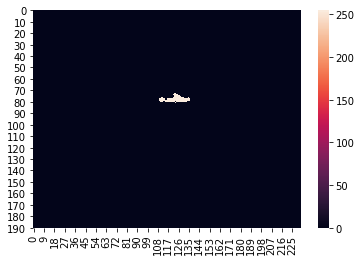

In [61]:
lesion_np = np.load('Stroke_Subjects_20200123/lesions/' + df.loc[0]["filename"] + '.npy')

sns.heatmap(lesion_np)

#Save as grayscale
io.imsave(stroke_path + 'lesions/' + df.loc[0]["filename"] + '.png', lesion_np)


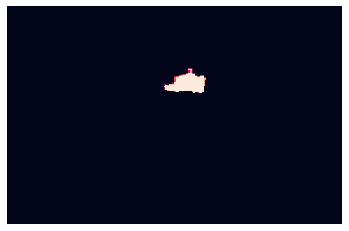

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(lesion_np, cbar=False, xticklabels=False, yticklabels=False)
plt.tick_params(axis='both', which='both', length=0)


In [85]:
#Save all lesions and brains as numpy arrays to train/image and train/label


print(stroke_subjects.index)

for row_index in stroke_subjects.index:
    
    file_name = df.loc[row_index]["filename"]
    
    img_np = np.load('Stroke_Subjects_20200123/brains/' + file_name + '.npy')
    
    img_np = resize(img_np, (192, 192),
                  mode='reflect',
                  preserve_range=True,
                  order=3)

    #img_uint8 = img_np.astype(np.uint8)
    
    #Save as grayscale
    np.save('train/'+ 'image/' + file_name + '.npy', img_np)
    
    lesion_np = np.load('Stroke_Subjects_20200123/lesions/' + file_name + '.npy')
    
    lesion_np = resize(lesion_np, (192, 192),
                  mode='reflect',
                  preserve_range=True,
                  order=3)

    np.save('train/' + 'label/' + file_name + '.npy', lesion_np)

    
    

Int64Index([   0,    1,    2,    6,    7,    8,   12,   13,   14,   18,
            ...
            1334, 1338, 1339, 1340, 1344, 1345, 1346, 1350, 1351, 1352],
           dtype='int64', length=678)


In [63]:
#GUI canvas dimensions
width = 600
height = 500

In [65]:
for row_index in stroke_subjects.index:
    file_name = df.loc[row_index]["filename"]
    
    img_np = np.load('Stroke_Subjects_20200123/brains/' + file_name + '.npy')
    
    print(img_np.shape)

(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)
(197, 233)

In [66]:
#Resize and save all brain images to assets
path = '../../prototype/src/assets/'

for row_index in stroke_subjects.index:
    
    file_name = df.loc[row_index]["filename"]
    
    img_np = np.load('Stroke_Subjects_20200123/brains/' + file_name + '.npy')
    
    img_np = resize(img_np, (height, width),
                  mode='reflect',
                  preserve_range=True,
                  order=3)
    
    #Normalizing
    
    #Save as grayscale
    io.imsave(path + file_name + '.png', img_np)
    

Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.13733361661434174, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.22184661030769348, 100.0]. Convert image to uint8 prior to s

Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 99.99999237060547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 99.99999237060547]. Convert image to uint8 prior to saving to

Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 99.99999237060547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 99.99999237060547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 99.99999237060547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior 

Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 100.0]. Convert image to uint8 prior to saving to suppress this warning.


In [102]:
import os
import shutil

In [104]:
#Remove all outputs
outputs = os.listdir("../output")
if '.DS_Store' in outputs:
    outputs.remove('.DS_Store')
print(outputs)
for output in outputs:
    shutil.rmtree("../output/" + output)

['2020_2_20_21_50']


In [105]:
#Remove all models
models = os.listdir("../models")
models.remove('model_tracking.csv')
print(models)
for model in models:
    os.remove("../models/" + model)

['unet_stroke_2020_2_20_21_48_init.hdf5']


In [106]:
#Sync ../models with ../models/model_tracking.csv
model_csv_path = "../models/model_tracking.csv"
models = os.listdir("../models")
models.remove('model_tracking.csv')
print(models)
model_df = pd.read_csv(model_csv_path)
models_in_csv = model_df['model_name'].tolist()
print(models_in_csv)

for index, row in model_df.iterrows():
    if row['model_name'] not in models:
        model_df.drop(index, inplace=True)

for model in models:
    if model not in models_in_csv:
        os.remove("../models/" + model)
        
model_df.to_csv(model_csv_path)

[]
['unet_stroke_2020_2_20_21_48_init.hdf5']


In [10]:
np.load('train/label/031773_Site1_t01_78.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'label/031773_Site1_t01_78.npy'